Wall time: 2.57 s


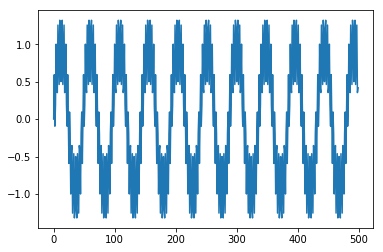

In [5]:
%%time
# # Configure Jupyter so figures appear in the notebook
# %matplotlib inline

# # Configure Jupyter to display the assigned value after an assignment
# %config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
# from modsim import *

import numpy as np
 
import wave
 
import struct
 
import matplotlib.pyplot as plt

import time

from time import time
 
# The sampling rate of the analog to digital convert
 
sampling_rate = 48000.0
 
amplitude = 16000

# frequency is the number of times a wave repeats a second
 
frequency = 1000
 
noisy_freq = 15000
 
num_samples = 48000
 
# The sampling rate of the analog to digital convert
 
sampling_rate = 48000


h=[2,    10,    14,     7,    -7,   -17,   -13 ,    3,
    19,    21,     4,   -21,   -32,   -16,    18 ,   43,
    34,    -8,   -51,   -56,   -11,    53,    81 ,   41,
    -44,  -104,   -81,    19,   119,   129,    24 , -119,
    -178,   -88,    95,   222,   171,   -41,  -248 , -266,
    -50,   244,   366,   181,  -195,  -457,  -353 ,   85,
    522,   568,   109,  -540,  -831,  -424,   474 , 1163,
    953,  -245, -1661, -2042,  -463,  2940,  6859 , 9469,
    9969,  6859,  2940,  -463, -2042, -1661,  -245 ,  953,
    1163,   474,  -424,  -831,  -540,   109,   568 ,  522,
    85,  -353,  -457,  -195,   181,   366,   244 ,  -50,
    -266,  -248,   -41,   171,   222,    95,   -88 , -178,
    -119,    24,   129,   119,    19,   -81,  -104 ,  -44,
    41,    81,    53,   -11,   -56,   -51,    -8 ,   34,
    43,    18,   -16,   -32,   -21,     4,    21 ,   19,
    3,   -13,   -17,    -7,     7,    14,    10 ,   -2];
#Create the sine wave and noise
 
sine_wave = [np.sin(2 * np.pi * frequency * x1 / sampling_rate) for x1 in range(num_samples)]
 
sine_noise = [0.5*np.sin(2 * np.pi * noisy_freq * x1/  sampling_rate) for x1 in range(num_samples)]
 
#Convert them to numpy arrays
 
sine_wave = np.array(sine_wave)
 
sine_noise = np.array(sine_noise)

# Add them to create a noisy signal
 
combined_signal = sine_wave + sine_noise

def fir_low (signal,sampling_rate):
    output= ['x' for n in range(sampling_rate)]
    for i in range (sampling_rate):
        acc=0
        for j in range(128):                   
            acc+=h[j]*signal[i-j]
        output[i]= acc
    return output



signal_after_filter=fir_low(combined_signal,sampling_rate)


plt.plot(combined_signal[:500])